In [409]:
import pandas as pd
import numpy as np

df = pd.read_csv('/home/andreea/uniwork/ads/ADS-European-Productivity/Datasets/cleaned_Productivity.csv')


In [410]:
df

,LOCATION,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,mean
0,AUS,43.813437,45.338482,46.025462,47.089456,46.931496,47.099677,47.342066,47.873036,49.523676,...,52.558753,52.780926,54.099648,53.945416,54.561035,54.559641,55.212012,56.214321,56.820351,50.587459
1,AUT,55.825179,56.533555,57.591558,58.071618,59.181589,60.632340,62.218785,63.814049,63.814456,...,66.080679,66.327394,67.267651,67.184974,67.999464,68.309455,68.309868,69.970148,69.634603,63.955261
2,BEL,63.089170,63.233672,63.667303,64.204011,66.278551,67.287921,67.637137,68.887444,68.464336,...,69.517696,70.513657,71.604653,71.674769,71.534022,71.681631,72.259271,74.541737,73.607184,68.830169
3,BGR,14.861829,15.438275,16.313284,16.783858,17.182034,17.965425,18.618248,19.229785,19.475667,...,22.460713,22.607390,23.296069,23.897609,24.130056,24.784139,25.687153,25.775778,26.559335,20.905039
4,CAN,44.249048,44.960465,45.686833,45.787448,46.167149,47.187987,47.742663,47.802103,47.658733,...,50.068609,51.425818,51.340885,51.524774,52.346352,52.543577,52.996192,56.971404,53.969872,49.328641
5,CHE,61.437020,62.847795,63.171539,62.871440,63.236690,64.693828,66.315161,67.595243,68.253612,...,69.759903,70.447419,69.982344,70.431631,71.561236,73.212853,73.619376,74.655861,75.909195,68.275833
6,CHL,17.914007,18.467892,18.642397,18.913712,19.666660,20.756781,21.576242,22.452244,22.983801,...,23.997201,24.412230,24.525405,24.869271,24.794088,25.319539,25.304435,28.606966,28.986876,22.887997
7,COL,9.652419,9.690187,9.482174,9.500538,10.052163,10.232035,10.890402,11.347122,11.360227,...,12.052849,12.371221,12.488134,12.724875,12.862658,13.050577,13.461440,16.115907,14.335103,11.680666
8,CRI,13.419427,13.340478,13.431107,13.620390,13.961451,13.718511,14.259665,14.453706,14.909054,...,18.620355,19.093774,19.707747,20.571849,21.056646,21.446167,22.038536,25.395334,24.023111,17.507325
9,CZE,25.998047,27.994158,28.429678,29.901424,31.147574,32.765277,34.781571,36.256014,36.139167,...,37.004724,37.432375,39.390083,39.251558,40.595969,41.161265,42.272668,43.289836,43.487932,36.016020


In [411]:
#data reshaped for easier timeseries analysis
df.drop('mean', axis=1, inplace=True)
prod_timeseries = pd.melt(df, id_vars = ['LOCATION'], var_name = 'YEAR', value_name= 'PRODUCTIVITY')
prod_timeseries = prod_timeseries.sort_values(['LOCATION', 'YEAR'], ascending=[True, True])


In [412]:
# prod_timeseries

In [413]:
df.drop([0,4,5,6, 7, 8, 16, 21, 22, 24, 25, 29, 32, 36, 40, 41, 42, 31],axis = 0, inplace = True)

Linear Regression on all data

In [414]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [415]:
#data before 2019 for training and adat after for testing
train_data = df.iloc[:, :-3] 
test_data = df.iloc[:, -3:]   


In [416]:
all_results = []
all_models = []

In [417]:
s = 0
results = []
for country in df.index:
    y_train = train_data.loc[country].values[1:].reshape(-1,1)
    X_train = train_data.loc[country].index.values[1:].reshape(-1,1)
    model = LinearRegression().fit(X_train, y_train)

    y_test = test_data.loc[country].values.reshape(-1, 1)
    X_test = test_data.loc[country].index.values.reshape(-1, 1)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred, squared=False)
    s+=mse
    if train_data.loc[country].values[:1] == 'IRL':
        irl = mse
    if train_data.loc[country].values[:1] == 'TUR':
        tur = mse
    results.append(mse)
    print(f"Country {train_data.loc[country].values[:1]}: MSE={mse}")
print('Mean of MSE for each country')
print(s/25)
all_results.append(results)
all_models.append('Linear Regression')

Country ['AUT']: MSE=1.5402672514568732
Country ['BEL']: MSE=0.7733341810596271
Country ['BGR']: MSE=0.2448717176641644
Country ['CZE']: MSE=0.24839362951149307
Country ['DEU']: MSE=0.3497399884271232
Country ['DNK']: MSE=1.4651427046981491
Country ['ESP']: MSE=1.6629505917491652
Country ['EST']: MSE=1.575627244553419
Country ['FIN']: MSE=1.4388145748222352
Country ['FRA']: MSE=0.8101934224312686
Country ['GRC']: MSE=0.4702819341487025
Country ['HRV']: MSE=2.0163879766484336
Country ['HUN']: MSE=0.43997875207102566
Country ['IRL']: MSE=20.871171888757235
Country ['ITA']: MSE=1.4499146130787963
Country ['LTU']: MSE=1.0785592083442843
Country ['LUX']: MSE=2.46320399143045
Country ['LVA']: MSE=0.7009947797448086
Country ['NLD']: MSE=2.73617909600272
Country ['POL']: MSE=1.8257928150699707
Country ['PRT']: MSE=0.6387842242448465
Country ['ROU']: MSE=1.6413290057905037
Country ['SVK']: MSE=0.850825932879051
Country ['SVN']: MSE=0.2845775938426048
Country ['SWE']: MSE=0.5139051869851017
Mean

In [418]:
print('Mean if you exclude Ireland')
print((s-irl)/24)

Mean if you exclude Ireland
1.1341687673606173


In [419]:

# print('Mean if you exclude Ireland and Turkey')
# print((s-irl-tur)/40)

In [420]:
#to do: calculate median value as most values seem close to 0

Support vector regression
https://www.section.io/engineering-education/support-vector-regression-in-python/

In [421]:

from sklearn.svm import SVR

In [422]:
rbfsum = 0
linearsum = 0
results_rbf = []
results_linear = []
for country in df.index:
    y_train = train_data.loc[country].values[1:].reshape(-1,1)
    X_train = train_data.loc[country].index.values[1:].reshape(-1,1)

    

    model = SVR(kernel= 'rbf').fit(X_train,y_train)
    model1 = SVR(kernel = 'linear').fit(X_train,y_train)


    y_test = test_data.loc[country].values.reshape(-1, 1)
    X_test = test_data.loc[country].index.values.reshape(-1, 1)
    y_pred = model.predict(X_test)
    y_pred1 = model1.predict(X_test)
    

    mse = mean_squared_error(y_test, y_pred, squared=False)
    mse1 = mean_squared_error(y_test, y_pred1, squared=False)
    rbfsum+=mse
    linearsum+=mse1
    if train_data.loc[country].values[:1] == 'IRL':
        irl = mse
        irl1 = mse1
    if train_data.loc[country].values[:1] == 'TUR':
        tur = mse
        tur1 = mse1
    results_rbf.append(mse)
    results_linear.append(mse1)


    print(f"Country {train_data.loc[country].values[:1]}: MSE for rbf ={mse}, MSE For linear = {mse1}")
all_results.append(results_rbf)
all_models.append('SVR rbf')
all_results.append(results_linear)
all_models.append('SVR linear')

/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was 

Country ['AUT']: MSE for rbf =3.724639109138294, MSE For linear = 1.8017691619487946
Country ['BEL']: MSE for rbf =3.034511880050041, MSE For linear = 0.7941279559391784
Country ['BGR']: MSE for rbf =3.7134725005888045, MSE For linear = 0.2228900276803353
Country ['CZE']: MSE for rbf =5.827559926611894, MSE For linear = 0.2412739237649698
Country ['DEU']: MSE for rbf =4.008420751325619, MSE For linear = 0.4893593128119339
Country ['DNK']: MSE for rbf =6.444229384499375, MSE For linear = 1.5549845308611796
Country ['ESP']: MSE for rbf =1.7185420053294795, MSE For linear = 1.8830771053426008
Country ['EST']: MSE for rbf =8.507001052880046, MSE For linear = 1.8820515369456954
Country ['FIN']: MSE for rbf =2.374515314045381, MSE For linear = 1.0259139028658093
Country ['FRA']: MSE for rbf =2.471344870248194, MSE For linear = 0.6943561123045886
Country ['GRC']: MSE for rbf =1.0656397670269542, MSE For linear = 1.1789165388740026
Country ['HRV']: MSE for rbf =1.7772085573539376, MSE For line

/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was 

In [423]:
#mean rbf
print(rbfsum/25)
#mean rbf without Ireland
print((rbfsum-irl)/24)
# #mean rbf without ireland and turkey
# print((rbfsum-irl-tur)/40)

6.309553071286404
4.629116321314966


In [424]:
#mean linear
print(linearsum/25)
#mean linear without Ireland
print((linearsum-irl1)/24)
# #mean linear without ireland and turkey
# print((linearsum-irl1-tur1)/40)

2.264656674021584
1.289785403876728


Data is clearly linear for most of teh cases and when predicting data by country should be treated separately. Would be worth looking into what countryes don't have linear data. Different hyperparameters are required to make predictions on different countries using smple models.

ARDRegression   
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html#sklearn.linear_model.ARDRegression

In [425]:
#bayesian linear regression type 1
from sklearn.linear_model import ARDRegression
scoresum = 0
predsum = 0
model = ARDRegression()
results = []
for country in df.index:
    y_train = train_data.loc[country].values[1:].reshape(-1,1)
    X_train = train_data.loc[country].index.values[1:].reshape(-1,1)
    model.fit( X = X_train,y = y_train)
    y_test = test_data.loc[country].values.reshape(-1,1)
    X_test = test_data.loc[country].index.values.reshape(-1,1)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred,squared=False)
    predsum +=mse
    scoresum +=score
    if train_data.loc[country].values[:1] == 'IRL':
        irl = mse
    if train_data.loc[country].values[:1] == 'TUR':
        tur = mse
    results.append(mse)
    print(f"Country {train_data.loc[country].values[:1]}: MSE ={mse}, score = {score}")
all_results.append(results)
all_models.append('bayesian linear regression')

Country ['AUT']: MSE =1.5192438104321826, score = -3.4923708633308115
Country ['BEL']: MSE =0.7743462112819895, score = 0.31688985994783103
Country ['BGR']: MSE =0.2427350808831764, score = 0.616436745108039
Country ['CZE']: MSE =0.2321317208380447, score = 0.8098722939305448


/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was 

Country ['DEU']: MSE =0.3658631987068369, score = 0.484343458803557
Country ['DNK']: MSE =1.4900766878613196, score = -4.812025097543953
Country ['ESP']: MSE =1.6453955094318429, score = -17.57485466310886
Country ['EST']: MSE =1.605478308559534, score = -1.1316559319636958
Country ['FIN']: MSE =1.3595100104960882, score = -65.89140486780721
Country ['FRA']: MSE =0.7979013746282346, score = -2.6022188978448146
Country ['GRC']: MSE =0.609647946044317, score = -1.3546755645699098
Country ['HRV']: MSE =1.9851385166497872, score = -1.3744226733577887
Country ['HUN']: MSE =0.4918318600870956, score = 0.590396012262867
Country ['IRL']: MSE =21.035568234683566, score = -2.7743709046734897
Country ['ITA']: MSE =1.5322088073603066, score = -4.290841681984729
Country ['LTU']: MSE =1.1018933312622567, score = 0.5460028835971343
Country ['LUX']: MSE =2.1170212001133057, score = -1.4457286373301361
Country ['LVA']: MSE =0.7131609147096292, score = 0.7403025517330851
Country ['NLD']: MSE =2.70319594

/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was 

In [426]:
#mean ARD
print(predsum/25)
#mean ARD without Ireland
print((predsum-irl)/24)
# #mean ARD without ireland and turkey
# print((predsum-irl-tur)/40)

#mean score
print(scoresum/25)


1.9252698480430555
1.1290074152663676
-8.562931824408256


BayesianRidge
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge

In [427]:
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
scoresum = 0
predsum = 0
for country in df.index:
    y_train = train_data.loc[country].values[1:].reshape(-1,1)
    X_train = train_data.loc[country].index.values[1:].reshape(-1,1)
    model.fit( X = X_train,y = y_train)
    y_test = test_data.loc[country].values.reshape(-1,1)
    X_test = test_data.loc[country].index.values.reshape(-1,1)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred, squared=False)
    predsum +=mse
    scoresum +=score
    if train_data.loc[country].values[:1] == 'IRL':
        irl = mse
    if train_data.loc[country].values[:1] == 'TUR':
        tur = mse
    print(f"Country {train_data.loc[country].values[:1]}: MSE ={mse}, score = {score}")
    

Country ['AUT']: MSE =1.5192438104321826, score = -3.4923708633308115
Country ['BEL']: MSE =0.7743462112819895, score = 0.31688985994783103
Country ['BGR']: MSE =0.2427350808831764, score = 0.616436745108039
Country ['CZE']: MSE =0.2321317208380447, score = 0.8098722939305448
Country ['DEU']: MSE =0.3658631987068369, score = 0.484343458803557
Country ['DNK']: MSE =1.4900766878613196, score = -4.812025097543953
Country ['ESP']: MSE =1.6453955094318429, score = -17.57485466310886
Country ['EST']: MSE =1.605478308559534, score = -1.1316559319636958
Country ['FIN']: MSE =1.3595100104961333, score = -65.89140486781166
Country ['FRA']: MSE =0.7979013746281854, score = -2.6022188978443697
Country ['GRC']: MSE =0.6096479460443549, score = -1.3546755645702024
Country ['HRV']: MSE =1.9851385166497872, score = -1.3744226733577887
Country ['HUN']: MSE =0.4918318600872191, score = 0.5903960122626614
Country ['IRL']: MSE =21.035568234683566, score = -2.7743709046734897
Country ['ITA']: MSE =1.532208

/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was 

In [428]:
#mean 
print(predsum/25)
#mean without Ireland
print((predsum-irl)/24)
# #mean without ireland and turkey
# print((predsum-irl-tur)/40)

#mean score
print(scoresum/25)



1.9252698480430561
1.1290074152663683
-8.56293182440843


ARDRegressian and BayessianRidge give exactly the sam e results in this case. The general comparisons between teh 2 models can be found here.

Hidden Markov models

In [429]:
# conda install hmmlearn

CategoricalHMM

In [430]:
#this is most likely not the right model for this but it is what it is; not sure how to make it work
from hmmlearn import hmm
model = hmm.CategoricalHMM()

#CategoricalHMM takes in the data with shape (n,1)
arr = prod_timeseries['PRODUCTIVITY'].to_numpy().astype(int)
train_arr = arr[:-66]
test_arr = arr[-66:]

train_arr = train_arr.reshape(-1,1)
test_arr = test_arr.reshape(-1,1)


model.fit(train_arr, lengths=22)
# model.sample(15)




CategoricalHMM(random_state=RandomState(MT19937) at 0x7F1304364B40)

In [431]:
model.get_stationary_distribution()

array([1.])

In [432]:
model.predict(test_arr)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [433]:
model.predict_proba(test_arr)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

GaussianHMM

In [434]:
#using the sam etraining and testing as we only have one feature; would be more intresting in a dataset with multiple timeseries and features
model = hmm.GaussianHMM()
model.fit(train_arr)
model.predict(test_arr)

/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

I am eithwe using this very wrong or markov models are not exactly the right choice when u have 1 feature

Vector autoregression (stil figuring this out)

In [435]:
#https://www.statsmodels.org/stable/vector_ar.html
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [436]:

df_t = df.transpose()
df_t.columns = df_t.iloc[0]
df_t = df_t.drop(df_t.index[0])
df_t


LOCATION,AUT,BEL,BGR,CZE,DEU,DNK,ESP,EST,FIN,FRA,...,LTU,LUX,LVA,NLD,POL,PRT,ROU,SVK,SVN,SWE
2000,55.825179,63.08917,14.861829,25.998047,56.051436,59.954667,44.963723,21.155461,51.309839,57.168797,...,19.916586,97.459711,16.745765,59.696492,22.242809,33.384117,12.320277,23.959311,31.263905,55.003831
2001,56.533555,63.233672,15.438275,27.994158,57.4591,59.743007,45.035756,22.383,52.287908,58.238429,...,22.233826,95.733237,17.446368,60.299505,23.011311,33.739822,13.105868,24.800377,32.355075,55.439481
2002,57.591558,63.667303,16.313284,28.429678,57.991792,60.234191,45.105579,23.877254,52.788651,59.938668,...,23.275853,96.465052,18.724063,60.739628,24.271393,33.992966,15.299585,26.583421,32.497236,57.448729
2003,58.071618,64.204011,16.783858,29.901424,58.437853,61.228274,45.239819,25.086689,53.884684,60.280773,...,25.403631,97.170243,20.237339,61.541637,25.3468,34.131576,15.921944,28.668586,33.50062,59.62107
2004,59.181589,66.278551,17.182034,31.147574,58.970058,63.183454,45.384816,26.787249,55.707489,60.946954,...,26.019537,98.973858,22.271015,62.603024,26.307045,34.875983,17.832453,29.479998,34.599443,61.719788
2005,60.63234,67.287921,17.965425,32.765277,59.900695,64.048343,45.562108,28.37254,56.779062,61.487911,...,27.812775,99.957636,23.911079,64.097939,26.72517,35.272311,18.818376,30.452693,36.938074,63.473288
2006,62.218785,67.637137,18.618248,34.781571,60.858653,64.892447,45.828539,29.802344,58.155532,63.018745,...,30.040743,102.035068,25.497929,65.051296,27.469543,35.927996,20.350859,32.274839,39.128271,65.301313
2007,63.814049,68.887444,19.229785,36.256014,61.577685,65.012119,46.335067,32.051758,60.024417,62.723395,...,32.197778,104.743364,27.53466,65.632495,28.184305,36.491637,21.467073,34.710747,40.808356,65.489276
2008,63.814456,68.464336,19.475667,36.139167,61.593702,64.044269,46.454358,30.93992,59.322583,62.323215,...,32.957143,99.685834,27.520156,66.009294,28.402336,36.727659,23.850073,35.458839,40.752803,64.336167
2009,63.363388,68.020751,19.717737,35.303035,59.739676,63.453957,47.573943,31.588678,56.695101,61.685771,...,31.543369,99.484621,28.25332,64.520326,29.321396,36.569423,23.643342,34.443631,38.181149,63.430047


In [437]:
print(df.dtypes)

LOCATION     object
2000        float64
2001        float64
2002        float64
2003        float64
2004        float64
2005        float64
2006        float64
2007        float64
2008        float64
2009        float64
2010        float64
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
2020        float64
2021        float64
dtype: object


In [438]:
df.drop(['LOCATION','2019', '2020','2021'] , axis =1).transpose()

,1,2,3,9,10,11,12,13,14,15,...,26,27,28,30,33,34,35,37,38,39
2000,55.825179,63.089170,14.861829,25.998047,56.051436,59.954667,44.963723,21.155461,51.309839,57.168797,...,19.916586,97.459711,16.745765,59.696492,22.242809,33.384117,12.320277,23.959311,31.263905,55.003831
2001,56.533555,63.233672,15.438275,27.994158,57.459100,59.743007,45.035756,22.383000,52.287908,58.238429,...,22.233826,95.733237,17.446368,60.299505,23.011311,33.739822,13.105868,24.800377,32.355075,55.439481
2002,57.591558,63.667303,16.313284,28.429678,57.991792,60.234191,45.105579,23.877254,52.788651,59.938668,...,23.275853,96.465052,18.724063,60.739628,24.271393,33.992966,15.299585,26.583421,32.497236,57.448729
2003,58.071618,64.204011,16.783858,29.901424,58.437853,61.228274,45.239819,25.086689,53.884684,60.280773,...,25.403631,97.170243,20.237339,61.541637,25.346800,34.131576,15.921944,28.668586,33.500620,59.621070
2004,59.181589,66.278551,17.182034,31.147574,58.970058,63.183454,45.384816,26.787249,55.707489,60.946954,...,26.019537,98.973858,22.271015,62.603024,26.307045,34.875983,17.832453,29.479998,34.599443,61.719788
2005,60.632340,67.287921,17.965425,32.765277,59.900695,64.048343,45.562108,28.372540,56.779062,61.487911,...,27.812775,99.957636,23.911079,64.097939,26.725170,35.272311,18.818376,30.452693,36.938074,63.473288
2006,62.218785,67.637137,18.618248,34.781571,60.858653,64.892447,45.828539,29.802344,58.155532,63.018745,...,30.040743,102.035068,25.497929,65.051296,27.469543,35.927996,20.350859,32.274839,39.128271,65.301313
2007,63.814049,68.887444,19.229785,36.256014,61.577685,65.012119,46.335067,32.051758,60.024417,62.723395,...,32.197778,104.743364,27.534660,65.632495,28.184305,36.491637,21.467073,34.710747,40.808356,65.489276
2008,63.814456,68.464336,19.475667,36.139167,61.593702,64.044269,46.454358,30.939920,59.322583,62.323215,...,32.957143,99.685834,27.520156,66.009294,28.402336,36.727659,23.850073,35.458839,40.752803,64.336167
2009,63.363388,68.020751,19.717737,35.303035,59.739676,63.453957,47.573943,31.588678,56.695101,61.685771,...,31.543369,99.484621,28.253320,64.520326,29.321396,36.569423,23.643342,34.443631,38.181149,63.430047


In [439]:
corrmap = df.drop(['LOCATION'] , axis =1).transpose().corr()

<Axes: >

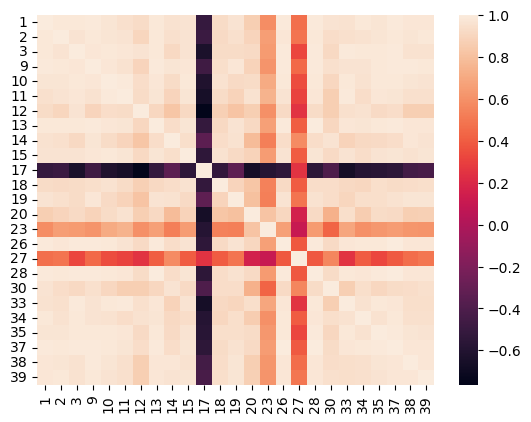

In [440]:
#checking for how highly correlated teh data is because 
import seaborn as sns
sns.heatmap(corrmap)

In [441]:
train = df.drop(['LOCATION','2019', '2020','2021'] , axis =1).transpose()
test = df.drop(['LOCATION','2018', '2017','2016','2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000'] , axis =1).transpose()

In [442]:
#there are too many countries for the model two work so I just dropped countries untill it worked
model = VAR(train)

/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [443]:
result = model.fit()

In [444]:
lag_order = result.k_ar
input_forecast = np.asarray(train.astype(np.float64))[-lag_order:]

forecast_df = pd.DataFrame(result.forecast(input_forecast,steps=3))
forecast_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,68.791768,70.219791,26.054973,42.896011,67.378911,74.606555,52.185199,41.031333,61.986190,68.597559,...,44.058622,96.729894,37.121960,67.842453,42.988523,39.059872,33.735669,45.452148,47.261212,72.122943
1,69.968137,70.171867,27.779818,45.425478,68.467436,76.536699,52.056047,44.353868,63.587732,68.660677,...,47.868603,96.572375,40.457550,67.697107,45.961735,39.344808,35.005414,49.133839,50.157848,74.330618
2,70.405158,69.438822,28.764106,46.672558,68.889085,76.328590,51.553488,45.359622,64.218355,67.961725,...,51.470705,93.205715,42.459455,67.627820,47.273453,39.739670,38.380110,51.455789,52.005428,74.398917


In [445]:
test = np.asarray(test.transpose()).astype(np.float64)
forecast = np.asarray(forecast_df.transpose()).astype(np.float64)


In [446]:
rsme = []
for i in range(len(forecast)):
    rsme.append(mean_squared_error(test[i], forecast[i], squared=False))
print(rsme)
print(np.mean(rsme))
print((np.sum(rsme)-13.626241352606424)/(len(rsme)-1))
# print((np.sum(rsme)-15.041921980802-4.332737532046457)/(len(rsme)-2))
all_results.append(rsme)
all_models.append('Vector Autoregression')

[0.5247179786154622, 3.6801488632765045, 1.7332516851948225, 2.242867508946257, 0.581619024882282, 0.9023055419921929, 0.4567708970799873, 1.6517979037594517, 1.7651917600321672, 1.108849912941434, 3.662859379678669, 4.1910103944699495, 1.7929400854759039, 8.979913177382, 3.3032345872885505, 3.7797627620832746, 4.305674903452336, 1.0018121929160746, 0.631603413363209, 4.3607558214777296, 0.7193590206035139, 1.3458082269116776, 2.508368491407146, 3.9051379076760786, 1.6011280404387673]
2.429475579253818
1.9629436720307922


In [447]:
# len(all_results[0])

In [448]:
# print(all_results)

In [449]:
# all_models.append('Exponential Smoothing')
# all_models.append('ARIMA')

In [450]:
# all_results.append([1.264168, 0.681315,None, 0.218372, 1.522639,2.210335,1.388061,3.855461,2.381937, None, 0.949941, 2.739312, 2.745133 	,  3.323107, 1.170394, 2.104377 , 3.982801, None, 0.957109 , 2.679198, 0.234918, 2.585345, 2.088690, 3.896335, 1.505407, 2.642568 ])
# all_results.append([0.364690, 0.463374, 1.112290, 0.328804, 1.462660, 0.482032, 0.478246, 1.099194, 0.672417, 0.668419,0.247137, 0.705303, 1.081031, 5.522861,0.771518, 0.426252,1.326578,1.376884, 0.573327, 0.898788, 0.258775,1.894317,0.758938,0.439069,0.441620,0.731250])

In [451]:
# #model comparison
all_results = np.asarray(all_results).T
# all_results


In [452]:
best_count= [0,0,0,0,0,0,0]
worst_count = [0,0,0,0,0,0,0]
for country in all_results:
    country = country[country != None]
    best_count[country.tolist().index(min(country))]+=1
    worst_count[country.tolist().index(max(country))]+=1

print(all_models)
print(best_count)
print(worst_count)


['Linear Regression', 'SVR rbf', 'SVR linear', 'bayesian linear regression', 'Vector Autoregression']
[10, 3, 6, 1, 5, 0, 0]
[1, 18, 1, 0, 5, 0, 0]


In [453]:
print(f"Mean Exponential Smoothing= {np.mean([0.681315, 0.218372, 1.522639,2.210335,1.388061,3.855461,2.381937,  0.949941, 2.739312, 2.745133 	,  3.323107, 1.170394, 2.104377 , 3.982801, 0.957109 , 2.679198, 0.234918, 2.585345, 2.088690, 3.896335, 1.505407, 2.642568 ])}")

Mean Exponential Smoothing= 2.0846706818181815


In [454]:
print(f"Mean Exponential Smoothing= {np.mean([0.364690, 0.463374, 1.112290, 0.328804, 1.462660, 0.482032, 0.478246, 1.099194, 0.672417, 0.668419,0.247137, 0.705303, 1.081031, 5.522861,0.771518, 0.426252,1.326578,1.376884, 0.573327, 0.898788, 0.258775,1.894317,0.758938,0.439069,0.441620,0.731250])}")

Mean Exponential Smoothing= 0.9456066923076922


In [455]:
#making the regional data; 
Australia = 'AUS'
Austria = 'AUT'
Belgium = 'BEL'
Bulgaria = 'BGR'
Canada = 'CAN'
Switzerland = 'CHE'
Chile = 'CHL'
Colombia = 'COL'
CostaRica = 'CRI'
CzechRepublic = 'CZE'
Germany = 'DEU'
Denmark = 'DNK'
Spain = 'ESP'
Estonia = 'EST'
Finland = 'FIN'
France = 'FRA'
UnitedKingdom = 'GBR'
Greece = 'GRC'
Croatia = 'HRV'
Hungary = 'HUN'
Ireland = 'IRL'
Iceland = 'ISL'
Israel = 'ISR'
Italy = 'ITA'
Japan = 'JPN'
Korea = 'KOR'
Lithuania = 'LTU'
Luxembourg = 'LUX'
Latvia = 'LVA'
Mexico = 'MEX'
Netherlands = 'NLD'
Norway = 'NOR'
NewZealand = 'NZL'
Poland = 'POL'
Portugal = 'PRT'
Romania = 'ROU'
Russia = 'RUS'
Slovakia = 'SVK'
Slovenia = 'SVN'
Sweden = 'SWE'
Turkey = 'TUR'
UnitedStates = 'USA'
SouthAfrica = 'ZAF'

# accordignly to https://www.cia.gov/the-world-factbook/field/location/

CentralEurope = [Austria, CzechRepublic, Germany, Hungary, Poland, Slovakia, Slovenia]
EasternEurope = [Estonia, Latvia, Lithuania]
NorthernEurope = [Denmark, Finland, Sweden]
SouthEasternEurope = [Bulgaria, Croatia, Romania]
SouthernEurope = [Greece, Italy]
SouthWesternEurope = [Portugal, Spain]
WesternEurope = [Belgium, France, Ireland, Luxembourg, Netherlands]

Europe = [CentralEurope, EasternEurope, NorthernEurope, SouthEasternEurope, SouthernEurope, SouthWesternEurope, WesternEurope]
EuropeFlat =  [country for subregion in Europe for country in subregion]

NorthAmerica = [Mexico, UnitedStates, Canada, CostaRica]
SouthAmerica = [Chile, Colombia]
Africa = [SouthAfrica]
Oceania = [Australia, NewZealand]
Asia = [Japan, Korea, Russia, Israel]

worldRegions = [EuropeFlat, NorthAmerica, SouthAmerica, Africa, Oceania, Asia]


In [456]:
import math

In [457]:
zeros = np.zeros(22)
for country in CentralEurope:
    zeros =zeros + np.array(df_t[country])
centraleuropedata = zeros/len(CentralEurope)

In [458]:
zeros = np.zeros(22)
for country in EasternEurope:
    zeros =zeros + np.array(df_t[country])
EasternEuropedata = zeros/len(EasternEurope)

In [459]:
zeros = np.zeros(22)
for country in NorthernEurope:
    zeros =zeros + np.array(df_t[country])
NorthernEuropedata = zeros/len(NorthernEurope)

In [460]:
zeros = np.zeros(22)
for country in SouthEasternEurope:
    zeros = zeros + np.array(df_t[country])
SouthEasternEuropedata = zeros/len(SouthEasternEurope)

In [461]:
zeros = np.zeros(22)
for country in SouthernEurope:
    zeros = zeros + np.array(df_t[country])
SouthernEuropedata = zeros/len(SouthernEurope)

In [462]:
zeros = np.zeros(22)
for country in SouthWesternEurope:
    zeros = zeros + np.array(df_t[country])
SouthWesternEuropedata = zeros/len(SouthWesternEurope)

In [463]:
zeros = np.zeros(22)
for country in WesternEurope:
    zeros = zeros + np.array(df_t[country])
WesternEuropedata = zeros/len(WesternEurope)

In [464]:
years = np.array([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
# print(len(years))
# print(len(centraleuropedata))
# print(len(EasternEuropedata ))
# EasternEuropedata

In [465]:


regional_df = pd.DataFrame({'year' : years,
                            'CentralEurope' : centraleuropedata,
                            'EasternEurope' : EasternEuropedata,
                            'NorthernEurope' : NorthernEuropedata,
                            'SouthEasternEurope' : SouthEasternEuropedata,
                            'SouthWesternEurope' : SouthWesternEuropedata, 
                            'SouthernEurope' : SouthernEuropedata,
                            'WesternEurope' : WesternEuropedata
})
regional_df = regional_df.set_index('year')

In [466]:
regional_df.dtypes

CentralEurope         object
EasternEurope         object
NorthernEurope        object
SouthEasternEurope    object
SouthWesternEurope    object
SouthernEurope        object
WesternEurope         object
dtype: object

In [467]:
#train test split for regional data
train_reg = regional_df.transpose().iloc[:, :-3] 
test_reg = regional_df.transpose().iloc[:, -3:]   

In [468]:
train_reg

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
CentralEurope,34.228938,35.40208,36.355127,37.432391,38.496143,39.875067,41.398716,42.747381,42.990988,42.011669,43.297506,44.330519,44.567766,44.854846,45.245085,46.130926,46.436239,47.669095,48.686983
EasternEurope,19.272604,20.687731,21.959057,23.575886,25.025934,26.698798,28.447005,30.594732,30.472406,30.461789,31.764705,32.352255,33.584697,34.100115,34.914267,35.222997,35.697685,37.447411,38.745043
NorthernEurope,55.422779,55.823465,56.823857,58.244676,60.203577,61.433564,62.783097,63.508604,62.567673,61.193035,63.420136,63.944514,63.941776,64.366063,65.015948,66.144692,66.745612,67.901994,68.271727
SouthEasternEurope,17.663246,18.43956,19.904179,20.55184,21.63702,22.562374,23.465419,24.217698,25.070068,24.388306,24.796491,25.826157,26.516672,27.272706,27.412687,28.58437,29.535088,30.39894,31.185311
SouthWesternEurope,39.17392,39.387789,39.549273,39.685698,40.130399,40.417209,40.878267,41.413352,41.591009,42.071683,43.234457,43.874364,44.538786,45.190254,45.070591,45.27054,45.40115,45.786263,45.707992
SouthernEurope,43.6743,44.556591,44.676822,45.303447,46.102345,45.661592,46.427132,46.92554,46.493513,45.444322,45.848579,44.648965,43.56992,43.388328,43.304445,43.920891,43.122062,43.524262,42.934407
WesternEurope,66.36396,66.666678,67.921161,68.642265,70.233822,71.085061,72.140282,73.197016,71.740084,71.783462,74.428983,74.578808,74.703738,75.058837,76.195071,79.711743,79.584012,80.442662,81.046592


In [469]:
test_reg

year,2019,2020,2021
CentralEurope,49.610463,50.453249,51.148895
EasternEurope,40.253129,42.338901,43.477422
NorthernEurope,68.966282,69.538876,70.462618
SouthEasternEurope,31.698569,30.675106,33.478455
SouthWesternEurope,46.149171,46.38122,46.169355
SouthernEurope,43.394488,44.640226,43.88459
WesternEurope,81.450258,86.074066,87.060247


In [470]:
#Linear regression
s = 0
for region in regional_df.transpose().index:
    y_train = train_reg.loc[region].values[1:].reshape(-1,1)
    X_train = train_reg.loc[region].index.values[1:].reshape(-1,1)
    model = LinearRegression().fit(X_train, y_train)

    y_test = test_reg.loc[region].values.reshape(-1, 1)
    X_test = test_reg.loc[region].index.values.reshape(-1, 1)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred, squared=False)
    s+=mse
    print(f"Region: {region}: MSE={mse}")
print(mse/7)

Region: CentralEurope: MSE=0.34079724116667803
Region: EasternEurope: MSE=1.269545624087372
Region: NorthernEurope: MSE=0.2281845875862613
Region: SouthEasternEurope: MSE=0.942943203955939
Region: SouthWesternEurope: MSE=1.1909106810530308
Region: SouthernEurope: MSE=1.116719150816292
Region: WesternEurope: MSE=3.311151975345342
0.47302171076362026


In [471]:
#Support Vector Regression
for region in regional_df.transpose().index:
    y_train = train_reg.loc[region].values[1:].reshape(-1,1)
    X_train = train_reg.loc[region].index.values[1:].reshape(-1,1)

    

    model = SVR(kernel= 'rbf').fit(X_train,y_train)
    model1 = SVR(kernel = 'linear').fit(X_train,y_train)


    y_test = test_reg.loc[region].values.reshape(-1, 1)
    X_test = test_reg.loc[region].index.values.reshape(-1, 1)
    y_pred = model.predict(X_test)
    y_pred1 = model1.predict(X_test)
    

    mse = mean_squared_error(y_test, y_pred, squared=False)
    mse1 = mean_squared_error(y_test, y_pred1, squared=False)
    rbfsum+=mse
    linearsum+=mse1

    print(f"Region: {region}: MSE for rbf ={mse}, MSE For linear = {mse1}")

Region: CentralEurope: MSE for rbf =5.228631887765317, MSE For linear = 0.5220209312044412
Region: EasternEurope: MSE for rbf =8.462063591365418, MSE For linear = 1.5203584518384996
Region: NorthernEurope: MSE for rbf =4.290212475475818, MSE For linear = 0.23263617546596427
Region: SouthEasternEurope: MSE for rbf =4.690860933997017, MSE For linear = 0.9280364298976203
Region: SouthWesternEurope: MSE for rbf =1.8781406028516723, MSE For linear = 1.0898013964635014
Region: SouthernEurope: MSE for rbf =0.4953758212771989, MSE For linear = 1.3787925596338249
Region: WesternEurope: MSE for rbf =9.25826678161193, MSE For linear = 2.743628028453271


/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was 

In [472]:
#Bayesian Ridge regression
model = BayesianRidge()
scoresum = 0
predsum = 0
for region in regional_df.transpose().index:
    y_train = train_reg.loc[region].values[1:].reshape(-1,1)
    X_train = train_reg.loc[region].index.values[1:].reshape(-1,1)
    model.fit( X = X_train,y = y_train)
    y_test = test_reg.loc[region].values.reshape(-1, 1)
    X_test = test_reg.loc[region].index.values.reshape(-1, 1)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred, squared=False)
    predsum +=mse
    scoresum +=score
    print(f"Country {region}: MSE ={mse}, score = {score}")
    

Country CentralEurope: MSE =0.3623271661429097, score = 0.6682013489232131
Country EasternEurope: MSE =1.2910195869462806, score = 0.06496126362381072
Country NorthernEurope: MSE =0.2650070229025044, score = 0.8151974481748792
Country SouthEasternEurope: MSE =0.9410754089964275, score = 0.339866293485268
Country SouthWesternEurope: MSE =1.1813446296520376, score = -125.69071107700063
Country SouthernEurope: MSE =1.0157339109213728, score = -2.9294280104383494
Country WesternEurope: MSE =3.334459715657923, score = -0.8591586956839614


/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was 

In [473]:
regional_df.dtypes

CentralEurope         object
EasternEurope         object
NorthernEurope        object
SouthEasternEurope    object
SouthWesternEurope    object
SouthernEurope        object
WesternEurope         object
dtype: object

In [474]:
#Regional Vector auto-regression
model = VAR(np.asarray(train_reg.transpose().astype(np.float64)))

In [475]:
np.asarray(train_reg.transpose().astype(np.float64)).shape

(19, 7)

In [476]:
x = model.select_order(maxlags=1)
x.summary()

,AIC,BIC,FPE,HQIC
0,-4.944,-4.598,0.007129,-4.897
1,-14.49*,-11.72*,8.125e-07*,-14.11*


In [477]:
result = model.fit(1)

In [478]:
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 25, Apr, 2023
Time:                     23:36:20
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -11.7195
Nobs:                     18.0000    HQIC:                  -14.1075
Log likelihood:           7.61922    FPE:                8.12508e-07
AIC:                     -14.4895    Det(Omega_mle):     6.19330e-08
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        25.292179        28.382464            0.891           0.373
L1.y1        -0.722893         0.597382           -1.210           0.226
L1.y2         0.962586         0.377921            2.547           0.011
L1.y3         0.407283

In [479]:
np.asarray(test_reg.transpose().astype(np.float64)).shape

(3, 7)

In [480]:
lag_order = result.k_ar
input_foreacst = np.asarray(train_reg.transpose().astype(np.float64))[-lag_order:]
input_foreacst


array([[48.68698329, 38.74504267, 68.27172667, 31.18531067, 45.707992  ,
        42.9344075 , 81.0465922 ]])

In [481]:
train_reg.transpose()

,CentralEurope,EasternEurope,NorthernEurope,SouthEasternEurope,SouthWesternEurope,SouthernEurope,WesternEurope
year,,,,,,,
2000,34.228938,19.272604,55.422779,17.663246,39.17392,43.6743,66.36396
2001,35.40208,20.687731,55.823465,18.43956,39.387789,44.556591,66.666678
2002,36.355127,21.959057,56.823857,19.904179,39.549273,44.676822,67.921161
2003,37.432391,23.575886,58.244676,20.55184,39.685698,45.303447,68.642265
2004,38.496143,25.025934,60.203577,21.63702,40.130399,46.102345,70.233822
2005,39.875067,26.698798,61.433564,22.562374,40.417209,45.661592,71.085061
2006,41.398716,28.447005,62.783097,23.465419,40.878267,46.427132,72.140282
2007,42.747381,30.594732,63.508604,24.217698,41.413352,46.92554,73.197016
2008,42.990988,30.472406,62.567673,25.070068,41.591009,46.493513,71.740084


In [482]:
forecast_df = pd.DataFrame(result.forecast(input_foreacst,steps=3))

In [483]:

forecast_df

,0,1,2,3,4,5,6
0,49.413728,39.665407,68.881703,32.065437,46.242563,44.137316,82.386689
1,49.899537,40.529538,69.639002,32.581523,46.618446,43.513488,82.863623
2,50.726439,41.540674,70.597436,33.283188,46.960654,43.647654,83.985263


In [484]:
test_reg.transpose()

,CentralEurope,EasternEurope,NorthernEurope,SouthEasternEurope,SouthWesternEurope,SouthernEurope,WesternEurope
year,,,,,,,
2019,49.610463,40.253129,68.966282,31.698569,46.149171,43.394488,81.450258
2020,50.453249,42.338901,69.538876,30.675106,46.38122,44.640226,86.074066
2021,51.148895,43.477422,70.462618,33.478455,46.169355,43.88459,87.060247


In [485]:
central_europe = np.array(test_reg.transpose()['CentralEurope']).astype(np.float64)
central_europe_prediction = np.array(forecast_df[0])

eastern_europe = np.array(test_reg.transpose()['EasternEurope']).astype(np.float64)
eastern_europe_prediction = np.array(forecast_df[1])

northern_europe = np.array(test_reg.transpose()['NorthernEurope']).astype(np.float64)
northern_europe_prediction = np.array(forecast_df[2])

south_eastern_europe = np.array(test_reg.transpose()['SouthEasternEurope']).astype(np.float64)
south_eastern_europe_prediction = np.array(forecast_df[3])

south_western_europe = np.array(test_reg.transpose()['SouthWesternEurope']).astype(np.float64)
south_western_europe_prediction = np.array(forecast_df[4])

southern_europe = np.array(test_reg.transpose()['SouthernEurope']).astype(np.float64)
southern_europe_prediction = np.array(forecast_df[5])

western_europe = np.array(test_reg.transpose()['WesternEurope']).astype(np.float64)
western_europe_prediction = np.array(forecast_df[6])


In [486]:
print(f"Central Europe: {mean_squared_error(central_europe, central_europe_prediction, squared=False)}")
print(f"Eastern Europe: {mean_squared_error(eastern_europe, eastern_europe_prediction, squared=False)}")
print(f"Northern Europe: {mean_squared_error(northern_europe, northern_europe_prediction, squared=False)}")
print(f"South Eastern Europe: {mean_squared_error(south_eastern_europe, south_eastern_europe_prediction, squared=False)}")
print(f"South Western Europe: {mean_squared_error(south_western_europe, south_western_europe_prediction, squared=False)}")
print(f"Southern Europe: {mean_squared_error(southern_europe, southern_europe_prediction, squared=False)}")
print(f"Western Europe: {mean_squared_error(western_europe, western_europe_prediction, squared=False)}")



Central Europe: 0.41783965364576875
Eastern Europe: 1.5673977710761828
Northern Europe: 0.10855824081214514
South Eastern Europe: 1.1265207426968047
South Western Europe: 0.47998344518054065
Southern Europe: 0.7910901855748524
Western Europe: 2.6229350895791437


In [487]:
# central_europe_df
central_europe_df = pd.DataFrame({'year' : years,
                            'CentralEurope' : centraleuropedata,
                            
})
central_europe_df = central_europe_df.set_index('year')
for country in CentralEurope:
    central_europe_df[country] = np.array(df_t[country]).astype(np.float64)


In [488]:
train_data = central_europe_df.drop([2019,2020,2021])
test_data = central_europe_df.drop([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])
train_data

,CentralEurope,AUT,CZE,DEU,HUN,POL,SVK,SVN
year,,,,,,,,
2000,34.228938,55.825179,25.998047,56.051436,24.261878,22.242809,23.959311,31.263905
2001,35.40208,56.533555,27.994158,57.459100,25.660983,23.011311,24.800377,32.355075
2002,36.355127,57.591558,28.429678,57.991792,27.120808,24.271393,26.583421,32.497236
2003,37.432391,58.071618,29.901424,58.437853,28.099839,25.346800,28.668586,33.500620
2004,38.496143,59.181589,31.147574,58.970058,29.787292,26.307045,29.479998,34.599443
2005,39.875067,60.632340,32.765277,59.900695,31.711223,26.725170,30.452693,36.938074
2006,41.398716,62.218785,34.781571,60.858653,33.059351,27.469543,32.274839,39.128271
2007,42.747381,63.814049,36.256014,61.577685,33.880508,28.184305,34.710747,40.808356
2008,42.990988,63.814456,36.139167,61.593702,34.775614,28.402336,35.458839,40.752803


In [489]:
model = VAR(np.asarray((train_data).astype(np.float64)))
result = model.fit()
result.summary()


/home/andreea/miniforge3/envs/uni/lib/python3.11/site-packages/statsmodels/tsa/vector_ar/var_model.py:1545: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 25, Apr, 2023
Time:                     23:36:21
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -43.6661
Nobs:                     18.0000    HQIC:                  -46.7365
Log likelihood:           292.721    FPE:                6.79133e-21
AIC:                     -47.2275    Det(Omega_mle):     1.76658e-22
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        14.934272        22.575578            0.662           0.508
L1.y1         0.123599              NAN              NAN             NAN
L1.y2         0.019550              NAN              NAN             NAN
L1.y3         0.707996

In [490]:
lag_order = result.k_ar
input_forecast = np.asarray(train_data.astype(np.float64))[-lag_order:]
forecast_df = pd.DataFrame(result.forecast(input_forecast,steps=3))
central_europe = np.array(test_data['CentralEurope']).astype(np.float64)
central_europe_prediction = np.array(forecast_df[0])
print(f'MSE for central europe based on data of the countries in the region: {mean_squared_error(central_europe, central_europe_prediction, squared=False)}')

MSE for central europe based on data of the countries in the region: 2.9402663110564937


In [491]:
# eastern_europe_df
eastern_europe_df = pd.DataFrame({'year' : years,
                            'EasternEurope' : EasternEuropedata,
                            
})
eastern_europe_df = eastern_europe_df.set_index('year')
for country in EasternEurope:
    eastern_europe_df[country] = np.array(df_t[country]).astype(np.float64)


In [492]:
train_data = eastern_europe_df.drop([2019,2020,2021])
test_data = eastern_europe_df.drop([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])
model = VAR(np.asarray((train_data).astype(np.float64)))
result = model.fit()


In [493]:
lag_order = result.k_ar
input_forecast = np.asarray(train_data.astype(np.float64))[-lag_order:]
print(lag_order)
forecast_df = pd.DataFrame(result.forecast(input_forecast,steps=3))
eastern_europe = np.array(test_data['EasternEurope']).astype(np.float64)
eastern_europe_prediction = np.array(forecast_df[0])
print(f'MSE for eastern europe based on data of the countries in the region: {mean_squared_error(eastern_europe, eastern_europe_prediction, squared=False)}')

1
MSE for eastern europe based on data of the countries in the region: 2.3731745713639847


In [494]:
#northern europe dataframe
northern_europe_df = pd.DataFrame({'year' : years,
                            'NorthernEurope' : NorthernEuropedata,
                            
})
northern_europe_df = northern_europe_df.set_index('year')
for country in NorthernEurope:
    northern_europe_df[country] = np.array(df_t[country]).astype(np.float64)


In [495]:
train_data = northern_europe_df.drop([2019,2020,2021])
test_data = northern_europe_df.drop([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])

model = VAR(np.asarray((train_data).astype(np.float64)))
result = model.fit()
lag_order = result.k_ar
input_forecast = np.asarray(train_data.astype(np.float64))[-lag_order:]

forecast_df = pd.DataFrame(result.forecast(input_forecast,steps=3))
northern_europe = np.array(test_data['NorthernEurope']).astype(np.float64)
northern_europe_prediction = np.array(forecast_df[0])
print(f'MSE for northern europe based on data of the countries in the region: {mean_squared_error(northern_europe, northern_europe_prediction, squared=False)}')


MSE for northern europe based on data of the countries in the region: 0.2507387022003691


In [496]:
# south eastern europe dataframe
south_eastern_europe_df = pd.DataFrame({'year' : years,
                            'SouthEasternEurope' : SouthEasternEuropedata,
                            
})
south_eastern_europe_df = south_eastern_europe_df.set_index('year')
for country in SouthEasternEurope:
    south_eastern_europe_df[country] = np.array(df_t[country]).astype(np.float64)


In [497]:
train_data = south_eastern_europe_df.drop([2019,2020,2021])
test_data = south_eastern_europe_df.drop([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])

model = VAR(np.asarray((train_data).astype(np.float64)))
result = model.fit()
lag_order = result.k_ar
input_forecast = np.asarray(train_data.astype(np.float64))[-lag_order:]

forecast_df = pd.DataFrame(result.forecast(input_forecast,steps=3))
south_eastern_europe = np.array(test_data['SouthEasternEurope']).astype(np.float64)
south_eastern_europe_prediction = np.array(forecast_df[0])
print(f'MSE for south eastern europe based on data of the countries in the region: {mean_squared_error(south_eastern_europe, south_eastern_europe_prediction, squared=False)}')


MSE for south eastern europe based on data of the countries in the region: 0.9775616106576812


In [498]:
south_western_europe_df = pd.DataFrame({'year' : years,
                            'SouthWesternEurope' : SouthWesternEuropedata,
                            
})
south_western_europe_df = south_western_europe_df.set_index('year')
for country in SouthWesternEurope:
    south_western_europe_df[country] = np.array(df_t[country]).astype(np.float64)

In [499]:
train_data = south_western_europe_df.drop([2019,2020,2021])
test_data = south_western_europe_df.drop([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])

model = VAR(np.asarray((train_data).astype(np.float64)))
result = model.fit()
lag_order = result.k_ar
input_forecast = np.asarray(train_data.astype(np.float64))[-lag_order:]

forecast_df = pd.DataFrame(result.forecast(input_forecast,steps=3))
south_western_europe = np.array(test_data['SouthWesternEurope']).astype(np.float64)
south_western_europe_prediction = np.array(forecast_df[0])
print(f'MSE for south western europe based on data of the countries in the region: {mean_squared_error(south_western_europe, south_western_europe_prediction, squared=False)}')


MSE for south western europe based on data of the countries in the region: 0.2350258669801528


In [500]:
southern_europe_df = pd.DataFrame({'year' : years,
                            'SouthernEurope' : SouthernEuropedata,
                            
})
southern_europe_df = southern_europe_df.set_index('year')
for country in SouthernEurope:
    southern_europe_df[country] = np.array(df_t[country]).astype(np.float64)

In [501]:
train_data = southern_europe_df.drop([2019,2020,2021])
test_data = southern_europe_df.drop([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])

model = VAR(np.asarray((train_data).astype(np.float64)))
result = model.fit()
lag_order = result.k_ar
input_forecast = np.asarray(train_data.astype(np.float64))[-lag_order:]

forecast_df = pd.DataFrame(result.forecast(input_forecast,steps=3))
southern_europe = np.array(test_data['SouthernEurope']).astype(np.float64)
southern_europe_prediction = np.array(forecast_df[0])
print(f'MSE for southern europe based on data of the countries in the region: {mean_squared_error(southern_europe, southern_europe_prediction, squared=False)}')


MSE for southern europe based on data of the countries in the region: 1.1005878991256104


In [502]:
western_europe_df = pd.DataFrame({'year' : years,
                            'WesternEurope' : WesternEuropedata,
                            
})
western_europe_df = western_europe_df.set_index('year')
for country in WesternEurope:
    western_europe_df[country] = np.array(df_t[country]).astype(np.float64)

In [503]:
train_data = western_europe_df.drop([2019,2020,2021])
test_data = western_europe_df.drop([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])

model = VAR(np.asarray((train_data).astype(np.float64)))
result = model.fit()
lag_order = result.k_ar
input_forecast = np.asarray(train_data.astype(np.float64))[-lag_order:]

forecast_df = pd.DataFrame(result.forecast(input_forecast,steps=3))
western_europe = np.array(test_data['WesternEurope']).astype(np.float64)
western_europe_prediction = np.array(forecast_df[0])
print(f'MSE for western europe based on data of the countries in the region: {mean_squared_error(western_europe, western_europe_prediction, squared=False)}')


MSE for western europe based on data of the countries in the region: 1.39280618252469
